In [0]:
# Credits: https://github.com/SullyChen/Autopilot-TensorFlow
# Research paper: End to End Learning for Self-Driving Cars by Nvidia. [https://arxiv.org/pdf/1604.07316.pdf]

# NVidia dataset: 72 hrs of video => 72*60*60*30 = 7,776,000 images
# Nvidia blog: https://devblogs.nvidia.com/deep-learning-self-driving-cars/


# Our Dataset: https://github.com/SullyChen/Autopilot-TensorFlow [https://drive.google.com/file/d/0B-KJCaaF7elleG1RbzVPZWV4Tlk/view]
# Size: 25 minutes = 25*60*30 = 45,000 images ~ 2.3 GB


# If you want to try on a slightly large dataset: 70 minutes of data ~ 223GB
# Refer: https://medium.com/udacity/open-sourcing-223gb-of-mountain-view-driving-data-f6b5593fbfa5
# Format: Image, latitude, longitude, gear, brake, throttle, steering angles and speed



# Additional Installations:
# pip3 install h5py


# AWS: https://aws.amazon.com/blogs/machine-learning/get-started-with-deep-learning-using-the-aws-deep-learning-ami/

# Youtube:https://www.youtube.com/watch?v=qhUvQiKec2U
# Further reading and extensions: https://medium.com/udacity/teaching-a-machine-to-steer-a-car-d73217f2492c
# More data: https://medium.com/udacity/open-sourcing-223gb-of-mountain-view-driving-data-f6b5593fbfa5

In [1]:
# read images and steering angles from driving_dataset folder

from __future__ import division

import os
import numpy as np
import random

from scipy import pi
from itertools import islice



DATA_FOLDER = 'driving_dataset' # change this to your folder
TRAIN_FILE = os.path.join(DATA_FOLDER, 'data.txt')


split =0.7
X = []
y = []
LIMIT=None
with open(TRAIN_FILE) as fp:
    for line in islice(fp,LIMIT):
        path, angle = line.strip().split()
        full_path = os.path.join(DATA_FOLDER, path)
        X.append(full_path)
        
        # converting angle from degrees to radians
        y.append(float(angle) * pi / 180 )


y = np.array(y)
print("Completed processing data.txt")

split_index = int(len(y)*0.7)

train_y = y[:split_index]
test_y = y[split_index:]

          

Completed processing data.txt


C:\Users\1407244\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


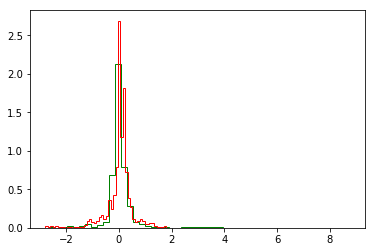

In [3]:
import numpy;

# PDF of train and test 'y' values. 
import matplotlib.pyplot as plt 
plt.hist(train_y, bins=50, normed=1, color='green', histtype ='step');
plt.hist(test_y, bins=50, normed=1, color='red', histtype ='step');
plt.show()




In [4]:
#Model 0: Base line Model: y_test_pred = mean(y_train_i) 
train_mean_y = np.mean(train_y)

print('Test_MSE(MEAN):%f' % np.mean(np.square(test_y-train_mean_y)) )

print('Test_MSE(ZERO):%f' % np.mean(np.square(test_y-0.0)) )


Test_MSE(MEAN):0.241561
Test_MSE(ZERO):0.241107


# Splitting the data 

In [5]:
import scipy.misc
import random

xs = []
ys = []

#points to the end of the last batch
train_batch_pointer = 0
val_batch_pointer = 0

#read data.txt
with open("driving_dataset/data.txt") as f:
    for line in f:
        xs.append("driving_dataset/" + line.split()[0])
        #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1]) * scipy.pi / 180)

#get number of images
num_images = len(xs)


train_xs = xs[:int(len(xs) * 0.7)]
train_ys = ys[:int(len(xs) * 0.7)]

val_xs = xs[-int(len(xs) * 0.3):]
val_ys = ys[-int(len(xs) * 0.3):]

num_train_images = len(train_xs)
num_val_images = len(val_xs)

def LoadTrainBatch(batch_size):
    global train_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], [66, 200]) / 255.0)
        y_out.append([train_ys[(train_batch_pointer + i) % num_train_images]])
    train_batch_pointer += batch_size
    return x_out, y_out

def LoadValBatch(batch_size):
    global val_batch_pointer
    x_out = []
    y_out = []
    for i in range(0, batch_size):
        x_out.append(scipy.misc.imresize(scipy.misc.imread(val_xs[(val_batch_pointer + i) % num_val_images])[-150:], [66, 200]) / 255.0)
        y_out.append([val_ys[(val_batch_pointer + i) % num_val_images]])
    val_batch_pointer += batch_size
    return x_out, y_out


In [6]:
# scipy.misc.imresize(scipy.misc.imread(train_xs[(train_batch_pointer + i) % num_train_images])[-150:], [66, 200]) / 255.0
# you can break the whole line into parts like this
# here (train_batch_pointer + i) % num_train_images => "% num_train_images" is used to make sure that the
# (train_batch_pointer + i) values should not cross number of train images.

# lets explain whats happening with the first images
image_read = scipy.misc.imread(train_xs[0])
print("original image size",image_read.shape)

print("After taking the last 150 rows i.e lower part of the images where road is present, ",image_read[-150:].shape)
image_read = image_read[-150:]
resized_image = scipy.misc.imresize(image_read, [66, 200])
print("After resizing the images into 66*200, ",resized_image.shape)
# 200/66 = 455/150 = 3.0303 => we are keeping aspect ratio when we are resizing it

C:\Users\1407244\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


original image size (256, 455, 3)
After taking the last 150 rows i.e lower part of the images where road is present,  (150, 455, 3)
After resizing the images into 66*200,  (66, 200, 3)


C:\Users\1407244\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if sys.path[0] == '':


In [0]:
scipy.misc.imresize(scipy.misc.imread(train_xs[0])[-150:], [66, 200])

D:\installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.
D:\installed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  """Entry point for launching an IPython kernel.


array([[[180, 162, 166],
        [176, 172, 173],
        [176, 176, 171],
        ...,
        [ 90,  88, 113],
        [106,  93,  99],
        [101, 103,  81]],

       [[191, 188, 192],
        [186, 193, 204],
        [187, 196, 200],
        ...,
        [ 84,  82,  97],
        [ 86,  88,  79],
        [ 86, 101,  74]],

       [[208, 201, 223],
        [199, 212, 230],
        [201, 212, 226],
        ...,
        [128, 124, 115],
        [128, 126, 117],
        [132, 126, 119]],

       ...,

       [[ 54,  43,  55],
        [ 59,  43,  56],
        [ 55,  41,  53],
        ...,
        [ 23,  24,  25],
        [ 24,  25,  27],
        [ 25,  26,  29]],

       [[ 56,  36,  58],
        [ 53,  35,  63],
        [ 51,  39,  54],
        ...,
        [ 23,  25,  22],
        [ 23,  26,  23],
        [ 24,  27,  25]],

       [[ 68,  37,  44],
        [ 53,  41,  49],
        [ 49,  49,  37],
        ...,
        [ 28,  25,  26],
        [ 26,  23,  25],
        [ 24,  22,  24]]

In [6]:
xs

['driving_dataset/0.jpg',
 'driving_dataset/1.jpg',
 'driving_dataset/2.jpg',
 'driving_dataset/3.jpg',
 'driving_dataset/4.jpg',
 'driving_dataset/5.jpg',
 'driving_dataset/6.jpg',
 'driving_dataset/7.jpg',
 'driving_dataset/8.jpg',
 'driving_dataset/9.jpg',
 'driving_dataset/10.jpg',
 'driving_dataset/11.jpg',
 'driving_dataset/12.jpg',
 'driving_dataset/13.jpg',
 'driving_dataset/14.jpg',
 'driving_dataset/15.jpg',
 'driving_dataset/16.jpg',
 'driving_dataset/17.jpg',
 'driving_dataset/18.jpg',
 'driving_dataset/19.jpg',
 'driving_dataset/20.jpg',
 'driving_dataset/21.jpg',
 'driving_dataset/22.jpg',
 'driving_dataset/23.jpg',
 'driving_dataset/24.jpg',
 'driving_dataset/25.jpg',
 'driving_dataset/26.jpg',
 'driving_dataset/27.jpg',
 'driving_dataset/28.jpg',
 'driving_dataset/29.jpg',
 'driving_dataset/30.jpg',
 'driving_dataset/31.jpg',
 'driving_dataset/32.jpg',
 'driving_dataset/33.jpg',
 'driving_dataset/34.jpg',
 'driving_dataset/35.jpg',
 'driving_dataset/36.jpg',
 'driving_d

# Defining CNN Model

In [6]:
import tensorflow as tf
import scipy

def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W, stride):
  return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding='VALID')

x = tf.placeholder(tf.float32, shape=[None, 66, 200, 3])
y_ = tf.placeholder(tf.float32, shape=[None, 1])

x_image = x

#first convolutional layer
W_conv1 = weight_variable([5, 5, 3, 24])
b_conv1 = bias_variable([24])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1, 2) + b_conv1)

#second convolutional layer
W_conv2 = weight_variable([5, 5, 24, 36])
b_conv2 = bias_variable([36])

h_conv2 = tf.nn.relu(conv2d(h_conv1, W_conv2, 2) + b_conv2)

#third convolutional layer
W_conv3 = weight_variable([5, 5, 36, 48])
b_conv3 = bias_variable([48])

h_conv3 = tf.nn.relu(conv2d(h_conv2, W_conv3, 2) + b_conv3)

#fourth convolutional layer
W_conv4 = weight_variable([3, 3, 48, 64])
b_conv4 = bias_variable([64])

h_conv4 = tf.nn.relu(conv2d(h_conv3, W_conv4, 1) + b_conv4)

#fifth convolutional layer
W_conv5 = weight_variable([3, 3, 64, 64])
b_conv5 = bias_variable([64])

h_conv5 = tf.nn.relu(conv2d(h_conv4, W_conv5, 1) + b_conv5)

#FCL 1
W_fc1 = weight_variable([1152, 1164])
b_fc1 = bias_variable([1164])

h_conv5_flat = tf.reshape(h_conv5, [-1, 1152])
h_fc1 = tf.nn.relu(tf.matmul(h_conv5_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

#FCL 2
W_fc2 = weight_variable([1164, 100])
b_fc2 = bias_variable([100])

h_fc2 = tf.nn.relu(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)

#FCL 3
W_fc3 = weight_variable([100, 50])
b_fc3 = bias_variable([50])

h_fc3 = tf.nn.relu(tf.matmul(h_fc2_drop, W_fc3) + b_fc3)

h_fc3_drop = tf.nn.dropout(h_fc3, keep_prob)

#FCL 3
W_fc4 = weight_variable([50, 10])
b_fc4 = bias_variable([10])

h_fc4 = tf.nn.relu(tf.matmul(h_fc3_drop, W_fc4) + b_fc4)

h_fc4_drop = tf.nn.dropout(h_fc4, keep_prob)

#Output
W_fc5 = weight_variable([10, 1])
b_fc5 = bias_variable([1])

y = tf.multiply(tf.tanh(tf.matmul(h_fc4_drop, W_fc5) + b_fc5), 2) #scale the atan output


C:\Users\1407244\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [7]:
import os
import tensorflow as tf
from tensorflow.core.protobuf import saver_pb2
import driving_data
import model

LOGDIR = './save'

sess = tf.InteractiveSession()

L2NormConst = 0.001

train_vars = tf.trainable_variables()

loss = tf.reduce_mean(tf.square(tf.subtract(model.y_, model.y))) + tf.add_n([tf.nn.l2_loss(v) for v in train_vars]) * L2NormConst
train_step = tf.train.RMSPropOptimizer(1e-4).minimize(loss)
sess.run(tf.initialize_all_variables())

# create a summary to monitor cost tensor
tf.summary.scalar("loss", loss)
# merge all summaries into a single op
merged_summary_op =  tf.summary.merge_all()

saver = tf.train.Saver(write_version = saver_pb2.SaverDef.V1)

# op to write logs to Tensorboard
logs_path = './logs'
summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())

epochs = 30
batch_size = 100

# train over the dataset about 30 times
for epoch in range(epochs):
  for i in range(int(driving_data.num_images/batch_size)):
    xs, ys = driving_data.LoadTrainBatch(batch_size)
    train_step.run(feed_dict={model.x: xs, model.y_: ys, model.keep_prob: 0.8})
    if i % 10 == 0:
      xs, ys = driving_data.LoadValBatch(batch_size)
      loss_value = loss.eval(feed_dict={model.x:xs, model.y_: ys, model.keep_prob: 1.0})
      print("Epoch: %d, Step: %d, Loss: %g" % (epoch, epoch * batch_size + i, loss_value))

    # write logs at every iteration
    summary = merged_summary_op.eval(feed_dict={model.x:xs, model.y_: ys, model.keep_prob: 1.0})
    summary_writer.add_summary(summary, epoch * driving_data.num_images/batch_size + i)

    if i % batch_size == 0:
      if not os.path.exists(LOGDIR):
        os.makedirs(LOGDIR)
      checkpoint_path = os.path.join(LOGDIR, "model.ckpt")
      filename = saver.save(sess, checkpoint_path)
  print("Model saved in file: %s" % filename)

print("Run the command line:\n" \
          "--> tensorboard --logdir=./logs " \
          "\nThen open http://0.0.0.0:6006/ into your web browser")

Instructions for updating:
Use `tf.global_variables_initializer` instead.
Epoch: 0, Step: 0, Loss: 14.0003
Epoch: 0, Step: 10, Loss: 14.0619
Epoch: 0, Step: 20, Loss: 13.0839
Epoch: 0, Step: 30, Loss: 12.6452
Epoch: 0, Step: 40, Loss: 12.4973
Epoch: 0, Step: 50, Loss: 12.3544
Epoch: 0, Step: 60, Loss: 12.3934
Epoch: 0, Step: 70, Loss: 13.256
Epoch: 0, Step: 80, Loss: 13.9371
Epoch: 0, Step: 90, Loss: 12.5752
Epoch: 0, Step: 100, Loss: 12.4022
Epoch: 0, Step: 110, Loss: 12.3361
Epoch: 0, Step: 120, Loss: 12.3166
Epoch: 0, Step: 130, Loss: 12.3209
Epoch: 0, Step: 140, Loss: 12.2829
Epoch: 0, Step: 150, Loss: 12.2324
Epoch: 0, Step: 160, Loss: 12.1571
Epoch: 0, Step: 170, Loss: 12.0332
Epoch: 0, Step: 180, Loss: 11.9738
Epoch: 0, Step: 190, Loss: 12.0953
Epoch: 0, Step: 200, Loss: 11.6594
Epoch: 0, Step: 210, Loss: 11.4654
Epoch: 0, Step: 220, Loss: 11.1623
Epoch: 0, Step: 230, Loss: 10.9791
Epoch: 0, Step: 240, Loss: 10.7867
Epoch: 0, Step: 250, Loss: 10.6315
Epoch: 0, Step: 260, Loss: 1

Epoch: 2, Step: 240, Loss: 3.06026
Epoch: 2, Step: 250, Loss: 3.05271
Epoch: 2, Step: 260, Loss: 3.69597
Epoch: 2, Step: 270, Loss: 4.01254
Epoch: 2, Step: 280, Loss: 2.8397
Epoch: 2, Step: 290, Loss: 2.8042
Epoch: 2, Step: 300, Loss: 2.70927
Epoch: 2, Step: 310, Loss: 2.67453
Epoch: 2, Step: 320, Loss: 2.61552
Epoch: 2, Step: 330, Loss: 2.64153
Epoch: 2, Step: 340, Loss: 2.58666
Epoch: 2, Step: 350, Loss: 2.6231
Epoch: 2, Step: 360, Loss: 2.48751
Epoch: 2, Step: 370, Loss: 2.46845
Epoch: 2, Step: 380, Loss: 2.79838
Epoch: 2, Step: 390, Loss: 2.63056
Epoch: 2, Step: 400, Loss: 2.37603
Epoch: 2, Step: 410, Loss: 2.27276
Epoch: 2, Step: 420, Loss: 2.23813
Epoch: 2, Step: 430, Loss: 2.22315
Epoch: 2, Step: 440, Loss: 2.1853
Epoch: 2, Step: 450, Loss: 2.22904
Epoch: 2, Step: 460, Loss: 7.77439
Epoch: 2, Step: 470, Loss: 2.26665
Epoch: 2, Step: 480, Loss: 2.03924
Epoch: 2, Step: 490, Loss: 1.99424
Epoch: 2, Step: 500, Loss: 1.96336
Epoch: 2, Step: 510, Loss: 1.9296
Epoch: 2, Step: 520, Loss

Epoch: 4, Step: 560, Loss: 0.794909
Epoch: 4, Step: 570, Loss: 1.10666
Epoch: 4, Step: 580, Loss: 0.880094
Epoch: 4, Step: 590, Loss: 0.661988
Epoch: 4, Step: 600, Loss: 0.662629
Epoch: 4, Step: 610, Loss: 0.633015
Epoch: 4, Step: 620, Loss: 0.624319
Epoch: 4, Step: 630, Loss: 0.615089
Epoch: 4, Step: 640, Loss: 1.08671
Epoch: 4, Step: 650, Loss: 5.65502
Epoch: 4, Step: 660, Loss: 0.620477
Epoch: 4, Step: 670, Loss: 0.684564
Epoch: 4, Step: 680, Loss: 0.652769
Epoch: 4, Step: 690, Loss: 0.605552
Epoch: 4, Step: 700, Loss: 0.645661
Epoch: 4, Step: 710, Loss: 0.671081
Epoch: 4, Step: 720, Loss: 0.666138
Epoch: 4, Step: 730, Loss: 0.583042
Epoch: 4, Step: 740, Loss: 0.585476
Epoch: 4, Step: 750, Loss: 0.825904
Epoch: 4, Step: 760, Loss: 0.791791
Epoch: 4, Step: 770, Loss: 0.600736
Epoch: 4, Step: 780, Loss: 0.769579
Epoch: 4, Step: 790, Loss: 0.714229
Epoch: 4, Step: 800, Loss: 0.617424
Epoch: 4, Step: 810, Loss: 0.899008
Epoch: 4, Step: 820, Loss: 0.560457
Epoch: 4, Step: 830, Loss: 0.58

Epoch: 6, Step: 860, Loss: 0.449523
Epoch: 6, Step: 870, Loss: 0.430071
Epoch: 6, Step: 880, Loss: 0.38871
Epoch: 6, Step: 890, Loss: 0.383792
Epoch: 6, Step: 900, Loss: 0.375728
Epoch: 6, Step: 910, Loss: 0.555692
Epoch: 6, Step: 920, Loss: 0.410561
Epoch: 6, Step: 930, Loss: 0.369173
Epoch: 6, Step: 940, Loss: 0.364461
Epoch: 6, Step: 950, Loss: 0.432589
Epoch: 6, Step: 960, Loss: 0.395988
Epoch: 6, Step: 970, Loss: 0.36591
Epoch: 6, Step: 980, Loss: 0.358561
Epoch: 6, Step: 990, Loss: 0.354262
Epoch: 6, Step: 1000, Loss: 0.357542
Epoch: 6, Step: 1010, Loss: 0.375597
Epoch: 6, Step: 1020, Loss: 0.375723
Epoch: 6, Step: 1030, Loss: 0.34078
Epoch: 6, Step: 1040, Loss: 0.509579
Epoch: 6, Step: 1050, Loss: 0.339409
Model saved in file: ./save\model.ckpt
Epoch: 7, Step: 700, Loss: 0.404126
Epoch: 7, Step: 710, Loss: 0.512485
Epoch: 7, Step: 720, Loss: 0.347576
Epoch: 7, Step: 730, Loss: 0.336568
Epoch: 7, Step: 740, Loss: 0.356458
Epoch: 7, Step: 750, Loss: 0.369326
Epoch: 7, Step: 760, L

Epoch: 8, Step: 1150, Loss: 0.322925
Epoch: 8, Step: 1160, Loss: 0.300241
Epoch: 8, Step: 1170, Loss: 0.283347
Epoch: 8, Step: 1180, Loss: 0.521861
Epoch: 8, Step: 1190, Loss: 0.40963
Epoch: 8, Step: 1200, Loss: 0.345217
Epoch: 8, Step: 1210, Loss: 0.492584
Epoch: 8, Step: 1220, Loss: 0.261706
Epoch: 8, Step: 1230, Loss: 0.259261
Epoch: 8, Step: 1240, Loss: 0.339485
Epoch: 8, Step: 1250, Loss: 0.353301
Model saved in file: ./save\model.ckpt
Epoch: 9, Step: 900, Loss: 0.396224
Epoch: 9, Step: 910, Loss: 0.257622
Epoch: 9, Step: 920, Loss: 0.25527
Epoch: 9, Step: 930, Loss: 0.25526
Epoch: 9, Step: 940, Loss: 0.278681
Epoch: 9, Step: 950, Loss: 0.25925
Epoch: 9, Step: 960, Loss: 0.32836
Epoch: 9, Step: 970, Loss: 0.301081
Epoch: 9, Step: 980, Loss: 5.27331
Epoch: 9, Step: 990, Loss: 0.849487
Epoch: 9, Step: 1000, Loss: 0.251883
Epoch: 9, Step: 1010, Loss: 0.267415
Epoch: 9, Step: 1020, Loss: 0.283205
Epoch: 9, Step: 1030, Loss: 0.27009
Epoch: 9, Step: 1040, Loss: 0.256491
Epoch: 9, Step: 

Epoch: 10, Step: 1410, Loss: 0.205376
Epoch: 10, Step: 1420, Loss: 0.201579
Epoch: 10, Step: 1430, Loss: 0.205961
Epoch: 10, Step: 1440, Loss: 0.395011
Epoch: 10, Step: 1450, Loss: 0.274627
Model saved in file: ./save\model.ckpt
Epoch: 11, Step: 1100, Loss: 0.226531
Epoch: 11, Step: 1110, Loss: 0.22538
Epoch: 11, Step: 1120, Loss: 0.233398
Epoch: 11, Step: 1130, Loss: 0.215882
Epoch: 11, Step: 1140, Loss: 0.273772
Epoch: 11, Step: 1150, Loss: 0.406443
Epoch: 11, Step: 1160, Loss: 0.350087
Epoch: 11, Step: 1170, Loss: 5.66732
Epoch: 11, Step: 1180, Loss: 0.433972
Epoch: 11, Step: 1190, Loss: 0.208863
Epoch: 11, Step: 1200, Loss: 0.353515
Epoch: 11, Step: 1210, Loss: 0.487239
Epoch: 11, Step: 1220, Loss: 0.269513
Epoch: 11, Step: 1230, Loss: 0.258504
Epoch: 11, Step: 1240, Loss: 0.43168
Epoch: 11, Step: 1250, Loss: 0.219814
Epoch: 11, Step: 1260, Loss: 0.199934
Epoch: 11, Step: 1270, Loss: 0.257135
Epoch: 11, Step: 1280, Loss: 0.206094
Epoch: 11, Step: 1290, Loss: 0.204103
Epoch: 11, Ste

Epoch: 13, Step: 1310, Loss: 0.169141
Epoch: 13, Step: 1320, Loss: 0.174477
Epoch: 13, Step: 1330, Loss: 0.171239
Epoch: 13, Step: 1340, Loss: 0.277601
Epoch: 13, Step: 1350, Loss: 1.22576
Epoch: 13, Step: 1360, Loss: 3.58282
Epoch: 13, Step: 1370, Loss: 0.172452
Epoch: 13, Step: 1380, Loss: 0.17087
Epoch: 13, Step: 1390, Loss: 0.192094
Epoch: 13, Step: 1400, Loss: 0.175122
Epoch: 13, Step: 1410, Loss: 0.180037
Epoch: 13, Step: 1420, Loss: 0.240241
Epoch: 13, Step: 1430, Loss: 0.249229
Epoch: 13, Step: 1440, Loss: 0.172692
Epoch: 13, Step: 1450, Loss: 0.164243
Epoch: 13, Step: 1460, Loss: 0.19186
Epoch: 13, Step: 1470, Loss: 0.791958
Epoch: 13, Step: 1480, Loss: 0.39703
Epoch: 13, Step: 1490, Loss: 0.299199
Epoch: 13, Step: 1500, Loss: 0.207048
Epoch: 13, Step: 1510, Loss: 0.201431
Epoch: 13, Step: 1520, Loss: 0.246207
Epoch: 13, Step: 1530, Loss: 0.534172
Epoch: 13, Step: 1540, Loss: 0.308453
Epoch: 13, Step: 1550, Loss: 0.22
Epoch: 13, Step: 1560, Loss: 0.656702
Epoch: 13, Step: 1570

Epoch: 15, Step: 1610, Loss: 0.355948
Epoch: 15, Step: 1620, Loss: 0.349524
Epoch: 15, Step: 1630, Loss: 0.149756
Epoch: 15, Step: 1640, Loss: 0.247331
Epoch: 15, Step: 1650, Loss: 0.157422
Epoch: 15, Step: 1660, Loss: 0.154887
Epoch: 15, Step: 1670, Loss: 0.169852
Epoch: 15, Step: 1680, Loss: 0.164094
Epoch: 15, Step: 1690, Loss: 0.205154
Epoch: 15, Step: 1700, Loss: 0.181719
Epoch: 15, Step: 1710, Loss: 0.156281
Epoch: 15, Step: 1720, Loss: 0.1693
Epoch: 15, Step: 1730, Loss: 0.184293
Epoch: 15, Step: 1740, Loss: 0.252504
Epoch: 15, Step: 1750, Loss: 0.194641
Epoch: 15, Step: 1760, Loss: 0.161382
Epoch: 15, Step: 1770, Loss: 0.160275
Epoch: 15, Step: 1780, Loss: 0.145079
Epoch: 15, Step: 1790, Loss: 0.149425
Epoch: 15, Step: 1800, Loss: 0.150776
Epoch: 15, Step: 1810, Loss: 0.166371
Epoch: 15, Step: 1820, Loss: 0.16759
Epoch: 15, Step: 1830, Loss: 0.179628
Epoch: 15, Step: 1840, Loss: 0.144029
Epoch: 15, Step: 1850, Loss: 0.195664
Epoch: 15, Step: 1860, Loss: 0.197819
Epoch: 15, Step

Epoch: 17, Step: 1870, Loss: 0.648137
Epoch: 17, Step: 1880, Loss: 0.436783
Epoch: 17, Step: 1890, Loss: 0.436765
Epoch: 17, Step: 1900, Loss: 0.181955
Epoch: 17, Step: 1910, Loss: 0.524613
Epoch: 17, Step: 1920, Loss: 0.304516
Epoch: 17, Step: 1930, Loss: 0.238801
Epoch: 17, Step: 1940, Loss: 0.184777
Epoch: 17, Step: 1950, Loss: 0.261544
Epoch: 17, Step: 1960, Loss: 0.394709
Epoch: 17, Step: 1970, Loss: 0.304539
Epoch: 17, Step: 1980, Loss: 0.573246
Epoch: 17, Step: 1990, Loss: 0.534067
Epoch: 17, Step: 2000, Loss: 0.17682
Epoch: 17, Step: 2010, Loss: 0.219454
Epoch: 17, Step: 2020, Loss: 0.322532
Epoch: 17, Step: 2030, Loss: 0.151242
Epoch: 17, Step: 2040, Loss: 0.155461
Epoch: 17, Step: 2050, Loss: 0.204316
Epoch: 17, Step: 2060, Loss: 0.35155
Epoch: 17, Step: 2070, Loss: 0.27577
Epoch: 17, Step: 2080, Loss: 0.213771
Epoch: 17, Step: 2090, Loss: 0.13853
Epoch: 17, Step: 2100, Loss: 0.185558
Epoch: 17, Step: 2110, Loss: 0.219472
Epoch: 17, Step: 2120, Loss: 0.156652
Epoch: 17, Step:

Epoch: 19, Step: 2110, Loss: 0.147804
Epoch: 19, Step: 2120, Loss: 0.156
Epoch: 19, Step: 2130, Loss: 0.131403
Epoch: 19, Step: 2140, Loss: 0.160928
Epoch: 19, Step: 2150, Loss: 0.147964
Epoch: 19, Step: 2160, Loss: 0.140218
Epoch: 19, Step: 2170, Loss: 0.119201
Epoch: 19, Step: 2180, Loss: 0.115969
Epoch: 19, Step: 2190, Loss: 0.132418
Epoch: 19, Step: 2200, Loss: 0.159171
Epoch: 19, Step: 2210, Loss: 0.147963
Epoch: 19, Step: 2220, Loss: 0.159721
Epoch: 19, Step: 2230, Loss: 0.142164
Epoch: 19, Step: 2240, Loss: 0.323408
Epoch: 19, Step: 2250, Loss: 0.190967
Epoch: 19, Step: 2260, Loss: 0.153402
Epoch: 19, Step: 2270, Loss: 0.120261
Epoch: 19, Step: 2280, Loss: 0.121562
Epoch: 19, Step: 2290, Loss: 0.134325
Epoch: 19, Step: 2300, Loss: 0.142026
Epoch: 19, Step: 2310, Loss: 0.140271
Epoch: 19, Step: 2320, Loss: 0.196521
Epoch: 19, Step: 2330, Loss: 0.17491
Epoch: 19, Step: 2340, Loss: 0.134445
Epoch: 19, Step: 2350, Loss: 0.123165
Model saved in file: ./save\model.ckpt
Epoch: 20, Step

Epoch: 21, Step: 2410, Loss: 0.125689
Epoch: 21, Step: 2420, Loss: 0.234221
Epoch: 21, Step: 2430, Loss: 0.338812
Epoch: 21, Step: 2440, Loss: 0.45171
Epoch: 21, Step: 2450, Loss: 0.156658
Epoch: 21, Step: 2460, Loss: 0.118632
Epoch: 21, Step: 2470, Loss: 0.115227
Epoch: 21, Step: 2480, Loss: 0.142302
Epoch: 21, Step: 2490, Loss: 0.112607
Epoch: 21, Step: 2500, Loss: 0.140896
Epoch: 21, Step: 2510, Loss: 0.13135
Epoch: 21, Step: 2520, Loss: 0.121986
Epoch: 21, Step: 2530, Loss: 0.178195
Epoch: 21, Step: 2540, Loss: 0.148202
Epoch: 21, Step: 2550, Loss: 0.105483
Model saved in file: ./save\model.ckpt
Epoch: 22, Step: 2200, Loss: 0.108768
Epoch: 22, Step: 2210, Loss: 0.123859
Epoch: 22, Step: 2220, Loss: 0.106294
Epoch: 22, Step: 2230, Loss: 0.129521
Epoch: 22, Step: 2240, Loss: 0.119949
Epoch: 22, Step: 2250, Loss: 0.140465
Epoch: 22, Step: 2260, Loss: 0.317461
Epoch: 22, Step: 2270, Loss: 0.156308
Epoch: 22, Step: 2280, Loss: 0.347992
Epoch: 22, Step: 2290, Loss: 0.149629
Epoch: 22, St

Epoch: 23, Step: 2710, Loss: 0.134135
Epoch: 23, Step: 2720, Loss: 0.146566
Epoch: 23, Step: 2730, Loss: 0.102148
Epoch: 23, Step: 2740, Loss: 0.115324
Epoch: 23, Step: 2750, Loss: 0.104869
Model saved in file: ./save\model.ckpt
Epoch: 24, Step: 2400, Loss: 0.10591
Epoch: 24, Step: 2410, Loss: 0.21626
Epoch: 24, Step: 2420, Loss: 0.123051
Epoch: 24, Step: 2430, Loss: 0.202452
Epoch: 24, Step: 2440, Loss: 0.151378
Epoch: 24, Step: 2450, Loss: 0.386479
Epoch: 24, Step: 2460, Loss: 0.272105
Epoch: 24, Step: 2470, Loss: 0.132805
Epoch: 24, Step: 2480, Loss: 0.10318
Epoch: 24, Step: 2490, Loss: 0.105381
Epoch: 24, Step: 2500, Loss: 0.115728
Epoch: 24, Step: 2510, Loss: 0.120891
Epoch: 24, Step: 2520, Loss: 0.190705
Epoch: 24, Step: 2530, Loss: 5.26924
Epoch: 24, Step: 2540, Loss: 0.193815
Epoch: 24, Step: 2550, Loss: 0.11912
Epoch: 24, Step: 2560, Loss: 0.133663
Epoch: 24, Step: 2570, Loss: 0.101343
Epoch: 24, Step: 2580, Loss: 0.101009
Epoch: 24, Step: 2590, Loss: 0.11236
Epoch: 24, Step: 

Epoch: 25, Step: 2950, Loss: 0.105475
Model saved in file: ./save\model.ckpt
Epoch: 26, Step: 2600, Loss: 0.130678
Epoch: 26, Step: 2610, Loss: 0.0929046
Epoch: 26, Step: 2620, Loss: 0.101231
Epoch: 26, Step: 2630, Loss: 0.204664
Epoch: 26, Step: 2640, Loss: 0.204898
Epoch: 26, Step: 2650, Loss: 0.275157
Epoch: 26, Step: 2660, Loss: 0.100011
Epoch: 26, Step: 2670, Loss: 0.107414
Epoch: 26, Step: 2680, Loss: 0.126362
Epoch: 26, Step: 2690, Loss: 0.136049
Epoch: 26, Step: 2700, Loss: 0.0955616
Epoch: 26, Step: 2710, Loss: 0.754628
Epoch: 26, Step: 2720, Loss: 4.40218
Epoch: 26, Step: 2730, Loss: 0.153292
Epoch: 26, Step: 2740, Loss: 0.178432
Epoch: 26, Step: 2750, Loss: 0.156588
Epoch: 26, Step: 2760, Loss: 0.131445
Epoch: 26, Step: 2770, Loss: 0.253193
Epoch: 26, Step: 2780, Loss: 0.23177
Epoch: 26, Step: 2790, Loss: 0.400796
Epoch: 26, Step: 2800, Loss: 0.446226
Epoch: 26, Step: 2810, Loss: 0.413016
Epoch: 26, Step: 2820, Loss: 0.341006
Epoch: 26, Step: 2830, Loss: 1.00438
Epoch: 26, S

Epoch: 28, Step: 2820, Loss: 0.362128
Epoch: 28, Step: 2830, Loss: 0.147532
Epoch: 28, Step: 2840, Loss: 0.273179
Epoch: 28, Step: 2850, Loss: 0.0923066
Epoch: 28, Step: 2860, Loss: 0.1157
Epoch: 28, Step: 2870, Loss: 0.0954705
Epoch: 28, Step: 2880, Loss: 0.0941965
Epoch: 28, Step: 2890, Loss: 0.0965996
Epoch: 28, Step: 2900, Loss: 2.41434
Epoch: 28, Step: 2910, Loss: 2.6923
Epoch: 28, Step: 2920, Loss: 0.10637
Epoch: 28, Step: 2930, Loss: 0.152977
Epoch: 28, Step: 2940, Loss: 0.147782
Epoch: 28, Step: 2950, Loss: 0.117038
Epoch: 28, Step: 2960, Loss: 0.0867492
Epoch: 28, Step: 2970, Loss: 0.153259
Epoch: 28, Step: 2980, Loss: 0.185296
Epoch: 28, Step: 2990, Loss: 0.113778
Epoch: 28, Step: 3000, Loss: 0.10514
Epoch: 28, Step: 3010, Loss: 0.121272
Epoch: 28, Step: 3020, Loss: 0.252076
Epoch: 28, Step: 3030, Loss: 0.136179
Epoch: 28, Step: 3040, Loss: 0.153148
Epoch: 28, Step: 3050, Loss: 0.117558
Epoch: 28, Step: 3060, Loss: 0.457277
Epoch: 28, Step: 3070, Loss: 0.372306
Epoch: 28, Ste

In [8]:
#pip3 install opencv-python

import tensorflow as tf
import scipy.misc
import model
import cv2
from subprocess import call
import math

sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, "save/model.ckpt")

img = cv2.imread('steering_wheel_image.jpg',0)
rows,cols = img.shape

smoothed_angle = 0


#read data.txt
xs = []
ys = []
with open("driving_dataset/data.txt") as f:
    for line in f:
        xs.append("driving_dataset/" + line.split()[0])
        #the paper by Nvidia uses the inverse of the turning radius,
        #but steering wheel angle is proportional to the inverse of turning radius
        #so the steering wheel angle in radians is used as the output
        ys.append(float(line.split()[1]) * scipy.pi / 180)

#get number of images
num_images = len(xs)


i = math.ceil(num_images*0.8)
print("Starting frameofvideo:" +str(i))

while(cv2.waitKey(10) != ord('q')):
    full_image = scipy.misc.imread("driving_dataset/" + str(i) + ".jpg", mode="RGB")
    image = scipy.misc.imresize(full_image[-150:], [66, 200]) / 255.0
    degrees = model.y.eval(feed_dict={model.x: [image], model.keep_prob: 1.0})[0][0] * 180.0 / scipy.pi
    #call("clear")
    #print("Predicted Steering angle: " + str(degrees))
    print("Steering angle: " + str(degrees) + " (pred)\t" + str(ys[i]*180/scipy.pi) + " (actual)")
    cv2.imshow("frame", cv2.cvtColor(full_image, cv2.COLOR_RGB2BGR))
    #make smooth angle transitions by turning the steering wheel based on the difference of the current angle
    #and the predicted angle
    smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow("steering wheel", dst)
    i += 1

cv2.destroyAllWindows()


INFO:tensorflow:Restoring parameters from save/model.ckpt


C:\Users\1407244\Anaconda3\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Starting frameofvideo:36325
Steering angle: 11.924664201158828 (pred)	-10.79 (actual)


C:\Users\1407244\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
C:\Users\1407244\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


Steering angle: 15.361816028316113 (pred)	-10.08 (actual)
Steering angle: 15.41519907932164 (pred)	-9.380000000000003 (actual)
Steering angle: 20.222853122877726 (pred)	-7.559999999999999 (actual)
Steering angle: 20.012580626637007 (pred)	-5.949999999999999 (actual)
Steering angle: 19.19219123750114 (pred)	-3.23 (actual)
Steering angle: 15.867115130660949 (pred)	-0.81 (actual)
Steering angle: 10.143232191082673 (pred)	1.21 (actual)
Steering angle: 7.381212119982591 (pred)	3.4300000000000006 (actual)
Steering angle: 6.471747245672828 (pred)	4.44 (actual)
Steering angle: 6.99874116325574 (pred)	5.340000000000001 (actual)
Steering angle: 7.645033299316211 (pred)	5.75 (actual)
Steering angle: 6.162297841362585 (pred)	7.16 (actual)
Steering angle: 5.091709658305868 (pred)	8.27 (actual)
Steering angle: 5.493593720201187 (pred)	9.48 (actual)
Steering angle: 4.943073642908989 (pred)	0.0 (actual)
Steering angle: 5.97642278083715 (pred)	9.88 (actual)
Steering angle: 6.700074493210831 (pred)	9.97

Steering angle: 48.566845565130215 (pred)	47.7 (actual)
Steering angle: 48.64118875915122 (pred)	47.7 (actual)
Steering angle: 50.87375903277495 (pred)	47.7 (actual)
Steering angle: 50.94325962267441 (pred)	47.7 (actual)
Steering angle: 52.03234011602212 (pred)	47.8 (actual)
Steering angle: 52.59436906206579 (pred)	47.8 (actual)
Steering angle: 52.6476411224973 (pred)	48.0 (actual)
Steering angle: 53.58121528391674 (pred)	0.0 (actual)
Steering angle: 52.99131233587025 (pred)	48.5 (actual)
Steering angle: 54.459635667788326 (pred)	48.71000000000001 (actual)
Steering angle: 56.10454329541332 (pred)	48.91 (actual)
Steering angle: 56.74769781332382 (pred)	49.11 (actual)
Steering angle: 57.67745048390264 (pred)	49.21 (actual)
Steering angle: 57.42366114491247 (pred)	49.41 (actual)
Steering angle: 56.923028769318044 (pred)	49.92 (actual)
Steering angle: 56.70385824413609 (pred)	50.12 (actual)
Steering angle: 56.62321078551117 (pred)	50.22 (actual)
Steering angle: 55.79410778254166 (pred)	50.

Steering angle: 31.843663552203843 (pred)	25.41 (actual)
Steering angle: 34.017121953655696 (pred)	25.61 (actual)
Steering angle: 35.23599311670657 (pred)	25.71 (actual)
Steering angle: 38.36781585117042 (pred)	25.820000000000004 (actual)
Steering angle: 39.717601250042925 (pred)	26.12 (actual)
Steering angle: 39.75662553586579 (pred)	26.520000000000003 (actual)
Steering angle: 40.65987024227579 (pred)	26.82 (actual)
Steering angle: 40.95710982967098 (pred)	27.03 (actual)
Steering angle: 40.47622694606165 (pred)	27.43 (actual)
Steering angle: 41.26762388971811 (pred)	27.73 (actual)
Steering angle: 42.00520918799861 (pred)	28.13 (actual)
Steering angle: 41.81476302337115 (pred)	28.44 (actual)
Steering angle: 40.80697885661952 (pred)	28.840000000000003 (actual)
Steering angle: 40.118816807173225 (pred)	29.04 (actual)
Steering angle: 39.97441977792999 (pred)	29.450000000000003 (actual)
Steering angle: 39.466629364085385 (pred)	29.95 (actual)
Steering angle: 38.69491702561691 (pred)	30.149

Steering angle: 16.237388223303803 (pred)	18.05 (actual)
Steering angle: 15.004711540393044 (pred)	18.05 (actual)
Steering angle: 13.230503309137825 (pred)	18.05 (actual)
Steering angle: 13.064288094364626 (pred)	17.95 (actual)
Steering angle: 12.269931117476618 (pred)	17.75 (actual)
Steering angle: 12.468451419476686 (pred)	17.04 (actual)
Steering angle: 12.124127923038003 (pred)	16.03 (actual)
Steering angle: 12.407758358511952 (pred)	15.230000000000002 (actual)
Steering angle: 11.955433349596088 (pred)	14.32 (actual)
Steering angle: 11.557941953110735 (pred)	13.92 (actual)
Steering angle: 11.86801973482462 (pred)	13.82 (actual)
Steering angle: 12.69821300674039 (pred)	13.82 (actual)
Steering angle: 13.971956202035852 (pred)	13.610000000000001 (actual)
Steering angle: 15.703275967945268 (pred)	13.31 (actual)
Steering angle: 16.810396698438268 (pred)	12.910000000000002 (actual)
Steering angle: 16.905022139199623 (pred)	12.5 (actual)
Steering angle: 15.010897984233782 (pred)	12.5 (actu

Steering angle: -7.059454287901161 (pred)	-4.44 (actual)
Steering angle: -5.574540853375947 (pred)	-4.54 (actual)
Steering angle: -5.120159530633087 (pred)	-4.74 (actual)
Steering angle: -5.249583931442012 (pred)	-5.75 (actual)
Steering angle: -0.5668805681493468 (pred)	-6.76 (actual)
Steering angle: -0.027804419450652533 (pred)	-7.760000000000002 (actual)
Steering angle: 0.6470831039828695 (pred)	-7.969999999999999 (actual)
Steering angle: 1.0945175373704448 (pred)	-7.969999999999999 (actual)
Steering angle: 2.0802243982904742 (pred)	-7.969999999999999 (actual)
Steering angle: 3.358810624594297 (pred)	-8.27 (actual)
Steering angle: 2.6395338618274207 (pred)	-8.77 (actual)
Steering angle: -0.44731066288929533 (pred)	-9.08 (actual)
Steering angle: -1.1239343083520434 (pred)	-9.28 (actual)
Steering angle: -3.371869092513715 (pred)	-9.380000000000003 (actual)
Steering angle: -3.646407905872143 (pred)	-9.380000000000003 (actual)
Steering angle: -3.6564371848946604 (pred)	-9.380000000000003

Steering angle: -22.270828996445395 (pred)	-19.46 (actual)
Steering angle: -22.339335793820624 (pred)	-19.46 (actual)
Steering angle: -22.840027933570287 (pred)	-19.46 (actual)
Steering angle: -23.97919078900711 (pred)	-19.36 (actual)
Steering angle: -25.15165593928962 (pred)	-19.36 (actual)
Steering angle: -26.640934291581296 (pred)	-19.36 (actual)
Steering angle: -27.047139301900295 (pred)	-19.87 (actual)
Steering angle: -27.58338769892175 (pred)	-20.97 (actual)
Steering angle: -29.462181494295496 (pred)	-22.29 (actual)
Steering angle: -30.988698037942083 (pred)	-24.200000000000003 (actual)
Steering angle: -31.642818424565032 (pred)	-25.61 (actual)
Steering angle: -32.07314083284334 (pred)	-27.43 (actual)
Steering angle: -33.21164457502526 (pred)	-29.14 (actual)
Steering angle: -33.998246725884364 (pred)	-30.449999999999992 (actual)
Steering angle: -34.7068993428407 (pred)	-31.26 (actual)
Steering angle: -34.929351773918846 (pred)	-32.06999999999999 (actual)
Steering angle: -35.64455

Steering angle: -71.52854136593324 (pred)	-70.08 (actual)
Steering angle: -70.45332615660065 (pred)	-69.07999999999998 (actual)
Steering angle: -69.57411688587993 (pred)	-68.97 (actual)
Steering angle: -67.99641148949868 (pred)	-68.97 (actual)
Steering angle: -69.26468199572167 (pred)	-68.37 (actual)
Steering angle: -69.42995891325765 (pred)	-67.16 (actual)
Steering angle: -69.07592971800838 (pred)	-65.14 (actual)
Steering angle: -69.38462694773627 (pred)	-64.03 (actual)
Steering angle: -69.74431153961831 (pred)	-63.32999999999999 (actual)
Steering angle: -70.00428219980734 (pred)	-63.230000000000004 (actual)
Steering angle: -70.36328377277238 (pred)	-63.230000000000004 (actual)
Steering angle: -71.47064185233904 (pred)	-63.230000000000004 (actual)
Steering angle: -71.81183029194868 (pred)	-63.230000000000004 (actual)
Steering angle: -72.0392755913101 (pred)	-63.230000000000004 (actual)
Steering angle: -72.8905220675688 (pred)	-63.230000000000004 (actual)
Steering angle: -72.4788050945

Steering angle: 4.459262742579837 (pred)	5.849999999999999 (actual)
Steering angle: 4.36555766980914 (pred)	5.849999999999999 (actual)
Steering angle: 4.079806460597901 (pred)	5.849999999999999 (actual)
Steering angle: 3.875442077989242 (pred)	5.55 (actual)
Steering angle: 3.491601668333804 (pred)	5.24 (actual)
Steering angle: 3.518122012220494 (pred)	4.84 (actual)
Steering angle: 3.102310340833873 (pred)	4.84 (actual)
Steering angle: 2.7553209361847695 (pred)	4.84 (actual)
Steering angle: 3.0560650509544205 (pred)	4.74 (actual)
Steering angle: 2.746423974460593 (pred)	4.74 (actual)
Steering angle: 2.224933481801419 (pred)	4.64 (actual)
Steering angle: 2.9808147224342743 (pred)	4.84 (actual)
Steering angle: 3.293142838036267 (pred)	5.24 (actual)
Steering angle: 3.271660398992696 (pred)	5.65 (actual)
Steering angle: 3.6793157572932644 (pred)	5.849999999999999 (actual)
Steering angle: 4.385829671265737 (pred)	6.45 (actual)
Steering angle: 5.388264092349951 (pred)	7.16 (actual)
Steering a

Steering angle: 1.0422946580284678 (pred)	2.32 (actual)
Steering angle: 0.7056371417986252 (pred)	3.23 (actual)
Steering angle: 0.8786118959726097 (pred)	3.9300000000000006 (actual)
Steering angle: 1.1428662053491436 (pred)	4.13 (actual)
Steering angle: 1.2038166790682219 (pred)	4.24 (actual)
Steering angle: 1.0343810301013618 (pred)	4.24 (actual)
Steering angle: 1.242277794449681 (pred)	4.24 (actual)
Steering angle: 1.133834133945448 (pred)	4.24 (actual)
Steering angle: 1.1887773495677942 (pred)	4.24 (actual)
Steering angle: 1.4131163002390383 (pred)	3.7300000000000004 (actual)
Steering angle: 1.2720569923441134 (pred)	3.23 (actual)
Steering angle: 0.994024110338401 (pred)	2.52 (actual)
Steering angle: 0.951169048886508 (pred)	2.12 (actual)
Steering angle: 0.9301297183653415 (pred)	1.71 (actual)
Steering angle: 0.5554748459265131 (pred)	1.21 (actual)
Steering angle: 0.33317355946418076 (pred)	0.71 (actual)
Steering angle: 0.13871979468142348 (pred)	0.0 (actual)
Steering angle: -0.1612

Steering angle: 4.595220646216703 (pred)	2.42 (actual)
Steering angle: 4.411005321659581 (pred)	2.7200000000000006 (actual)
Steering angle: 3.916663550290738 (pred)	2.92 (actual)
Steering angle: 3.9021515327385767 (pred)	2.92 (actual)
Steering angle: 3.5068852838187654 (pred)	3.03 (actual)
Steering angle: 3.2593634971657344 (pred)	3.03 (actual)
Steering angle: 3.1612467625214435 (pred)	2.7200000000000006 (actual)
Steering angle: 2.9803054464542855 (pred)	2.32 (actual)
Steering angle: 2.994466349594426 (pred)	2.02 (actual)
Steering angle: 2.9771767929275965 (pred)	1.92 (actual)
Steering angle: 2.828649206783792 (pred)	1.82 (actual)
Steering angle: 2.899961931247425 (pred)	1.51 (actual)
Steering angle: 2.7886326225405678 (pred)	1.11 (actual)
Steering angle: 2.608373044729942 (pred)	0.5 (actual)
Steering angle: 2.6119027584269574 (pred)	0.0 (actual)
Steering angle: 2.569203190500388 (pred)	-0.3 (actual)
Steering angle: 2.215401525927843 (pred)	-0.3 (actual)
Steering angle: 1.9245210580933

Steering angle: 6.237555853845548 (pred)	7.969999999999999 (actual)
Steering angle: 6.362882141152465 (pred)	7.559999999999999 (actual)
Steering angle: 6.035482999703428 (pred)	7.06 (actual)
Steering angle: 6.13392224734259 (pred)	6.25 (actual)
Steering angle: 6.141828618193703 (pred)	5.340000000000001 (actual)
Steering angle: 5.562279810042128 (pred)	4.64 (actual)
Steering angle: 5.720418326121787 (pred)	4.13 (actual)
Steering angle: 5.677702323052527 (pred)	3.7300000000000004 (actual)
Steering angle: 5.782916691461519 (pred)	3.23 (actual)
Steering angle: 5.390022439174406 (pred)	2.7200000000000006 (actual)
Steering angle: 5.171392352710529 (pred)	2.32 (actual)
Steering angle: 5.062971210486216 (pred)	2.02 (actual)
Steering angle: 5.058990490860568 (pred)	1.41 (actual)
Steering angle: 5.193128575970449 (pred)	0.81 (actual)
Steering angle: 4.9440665816595795 (pred)	-0.1 (actual)
Steering angle: 5.118527542308277 (pred)	-0.81 (actual)
Steering angle: 4.93488509986779 (pred)	-1.51 (actua

Steering angle: 3.38451881629999 (pred)	-9.380000000000003 (actual)
Steering angle: 3.582702731483434 (pred)	-9.68 (actual)
Steering angle: 2.8939210558133723 (pred)	-9.88 (actual)
Steering angle: 2.1667078266743527 (pred)	-10.08 (actual)
Steering angle: 1.8139396551005955 (pred)	-10.08 (actual)
Steering angle: 1.1994880466817264 (pred)	-10.08 (actual)
Steering angle: 0.9232393381532681 (pred)	-10.08 (actual)
Steering angle: 0.5201546037070549 (pred)	-10.08 (actual)
Steering angle: -0.01135604326879245 (pred)	-10.08 (actual)
Steering angle: -0.2909991690517619 (pred)	-10.08 (actual)
Steering angle: -0.1135450247416523 (pred)	-10.08 (actual)
Steering angle: -0.0720286069959091 (pred)	-10.08 (actual)
Steering angle: 0.026198471222053283 (pred)	-10.08 (actual)
Steering angle: 0.7864135202441348 (pred)	-10.08 (actual)
Steering angle: 0.7852140216320042 (pred)	-10.08 (actual)
Steering angle: 0.6086209213843525 (pred)	-10.08 (actual)
Steering angle: 0.5284189725202116 (pred)	-10.08 (actual)


Steering angle: -3.5858194321790755 (pred)	-0.91 (actual)
Steering angle: -2.97412903445389 (pred)	-0.91 (actual)
Steering angle: -2.32733167783825 (pred)	-0.81 (actual)
Steering angle: -1.9826103228804142 (pred)	-0.81 (actual)
Steering angle: -1.1106034866394712 (pred)	-0.61 (actual)
Steering angle: -1.3035805565195437 (pred)	-0.5 (actual)
Steering angle: -1.0269844688387668 (pred)	-0.4 (actual)
Steering angle: -1.0241335051905214 (pred)	0.0 (actual)
Steering angle: -0.6409113877375283 (pred)	0.61 (actual)
Steering angle: -0.7250699904826635 (pred)	1.11 (actual)
Steering angle: 0.3941067709473488 (pred)	1.31 (actual)
Steering angle: 0.5893304394558266 (pred)	1.31 (actual)
Steering angle: 0.6192103826405169 (pred)	1.31 (actual)
Steering angle: 0.771366453420038 (pred)	1.31 (actual)
Steering angle: 1.2382001715151834 (pred)	1.31 (actual)
Steering angle: 1.1354777549361883 (pred)	1.31 (actual)
Steering angle: 1.0565251437207779 (pred)	1.31 (actual)
Steering angle: 1.0304595410224224 (pre

Steering angle: 40.37167724043627 (pred)	28.64 (actual)
Steering angle: 35.73560779411466 (pred)	28.64 (actual)
Steering angle: 32.107961137232074 (pred)	28.64 (actual)
Steering angle: 26.15736885117544 (pred)	28.54 (actual)
Steering angle: 23.3226012889992 (pred)	28.54 (actual)
Steering angle: 21.85384765516341 (pred)	28.54 (actual)
Steering angle: 20.389752210341573 (pred)	28.44 (actual)
Steering angle: 21.249813045724164 (pred)	28.34 (actual)
Steering angle: 23.177200221947967 (pred)	28.34 (actual)
Steering angle: 24.74935779717587 (pred)	0.0 (actual)
Steering angle: 23.045136806798478 (pred)	28.34 (actual)
Steering angle: 11.96141659530902 (pred)	0.0 (actual)
Steering angle: 14.776907656100194 (pred)	28.34 (actual)
Steering angle: 27.635570344180646 (pred)	28.34 (actual)
Steering angle: 30.63996906948874 (pred)	28.34 (actual)
Steering angle: 29.986808324444176 (pred)	28.34 (actual)
Steering angle: 33.115721398321604 (pred)	28.34 (actual)
Steering angle: 32.622786645921785 (pred)	28

Steering angle: 31.656939840674035 (pred)	39.53 (actual)
Steering angle: 31.085997497763497 (pred)	37.61 (actual)
Steering angle: 28.96446902457125 (pred)	35.70000000000001 (actual)
Steering angle: 28.162563834876735 (pred)	34.49 (actual)
Steering angle: 24.7962487533753 (pred)	33.58 (actual)
Steering angle: 23.14588038950887 (pred)	32.87 (actual)
Steering angle: 24.501775392593952 (pred)	32.57 (actual)
Steering angle: 24.893923873601064 (pred)	32.37 (actual)
Steering angle: 23.83318525021433 (pred)	31.87 (actual)
Steering angle: 23.350470168360143 (pred)	31.359999999999996 (actual)
Steering angle: 22.764931711193288 (pred)	30.76 (actual)
Steering angle: 22.279395761211884 (pred)	29.849999999999998 (actual)
Steering angle: 20.722573668217954 (pred)	29.14 (actual)
Steering angle: 20.07317294231148 (pred)	28.24 (actual)
Steering angle: 19.10799037296052 (pred)	26.920000000000005 (actual)
Steering angle: 16.751703175353054 (pred)	25.210000000000004 (actual)
Steering angle: 16.554862246115

Steering angle: -3.850032493616325 (pred)	20.370000000000005 (actual)
Steering angle: -3.9602640628575143 (pred)	14.52 (actual)
Steering angle: -3.843058870473742 (pred)	11.39 (actual)
Steering angle: -3.656109762701323 (pred)	6.76 (actual)
Steering angle: -4.227154985336232 (pred)	3.7300000000000004 (actual)
Steering angle: -4.548161923495784 (pred)	0.5 (actual)
Steering angle: -4.530576320817117 (pred)	-0.5 (actual)
Steering angle: -4.405639781179713 (pred)	-1.51 (actual)
Steering angle: -4.485502621823733 (pred)	-1.92 (actual)
Steering angle: -4.469932351837043 (pred)	-2.12 (actual)
Steering angle: -4.416064357400445 (pred)	-2.52 (actual)
Steering angle: -4.486292789333339 (pred)	-3.4300000000000006 (actual)
Steering angle: -4.1037701793008905 (pred)	-4.24 (actual)
Steering angle: -3.578375806644231 (pred)	-5.45 (actual)
Steering angle: -2.956841612221176 (pred)	-5.75 (actual)
Steering angle: -2.7947343293469165 (pred)	-5.45 (actual)
Steering angle: -2.7241631072950523 (pred)	-2.03 

Steering angle: -2.4148942761109904 (pred)	8.27 (actual)
Steering angle: -2.745932200840352 (pred)	8.27 (actual)
Steering angle: -2.4878054782838186 (pred)	8.27 (actual)
Steering angle: -2.481146684173291 (pred)	8.27 (actual)
Steering angle: -2.361817729844468 (pred)	8.27 (actual)
Steering angle: -2.3331066027814957 (pred)	8.27 (actual)
Steering angle: -2.0340245718576853 (pred)	8.27 (actual)
Steering angle: -1.828149436781984 (pred)	8.27 (actual)
Steering angle: -1.7349579088595066 (pred)	8.27 (actual)
Steering angle: -1.8902119506753048 (pred)	8.27 (actual)
Steering angle: -1.8433666713659491 (pred)	0.0 (actual)
Steering angle: -1.8373972994747696 (pred)	8.27 (actual)
Steering angle: -2.167012837309476 (pred)	8.27 (actual)
Steering angle: -2.45699022606966 (pred)	8.27 (actual)
Steering angle: -2.321200515841106 (pred)	8.27 (actual)
Steering angle: -2.41866624808013 (pred)	8.27 (actual)
Steering angle: -2.359836548098341 (pred)	8.27 (actual)
Steering angle: -2.2142228914091926 (pred)	

Steering angle: -2.279822589518934 (pred)	8.27 (actual)
Steering angle: -2.3595449843981458 (pred)	8.27 (actual)
Steering angle: -2.1100840643510663 (pred)	8.27 (actual)
Steering angle: -2.5353924734483555 (pred)	8.27 (actual)
Steering angle: -2.232079994107368 (pred)	8.27 (actual)
Steering angle: -2.2443832992366763 (pred)	8.27 (actual)
Steering angle: -1.9789478473814064 (pred)	8.27 (actual)
Steering angle: -2.0252881195790042 (pred)	8.27 (actual)
Steering angle: -1.97154221477382 (pred)	8.27 (actual)
Steering angle: -1.8862463855318776 (pred)	8.27 (actual)
Steering angle: -1.4369494982958573 (pred)	8.27 (actual)
Steering angle: -1.6900334068108056 (pred)	8.27 (actual)
Steering angle: -1.8431643270117875 (pred)	8.27 (actual)
Steering angle: -1.8570938574937939 (pred)	8.27 (actual)
Steering angle: -2.160430882827111 (pred)	8.27 (actual)
Steering angle: -2.135008705292912 (pred)	8.27 (actual)
Steering angle: -2.3914761187679554 (pred)	8.27 (actual)
Steering angle: -2.4599325434980543 (

Steering angle: -0.7640465183421942 (pred)	8.27 (actual)
Steering angle: -0.6381409456162948 (pred)	8.27 (actual)
Steering angle: -0.5977594798610042 (pred)	8.27 (actual)
Steering angle: -0.563152672244695 (pred)	8.27 (actual)
Steering angle: -0.46378398526988185 (pred)	8.27 (actual)
Steering angle: -0.5573505866273278 (pred)	8.27 (actual)
Steering angle: -0.8269589105395057 (pred)	8.27 (actual)
Steering angle: -1.013744787462932 (pred)	8.27 (actual)
Steering angle: -0.8804491101376374 (pred)	8.27 (actual)
Steering angle: -0.9409864107727827 (pred)	8.27 (actual)
Steering angle: -0.7560277695348935 (pred)	8.17 (actual)
Steering angle: -0.33077405531181714 (pred)	8.17 (actual)
Steering angle: 0.14639947528924335 (pred)	8.07 (actual)
Steering angle: -0.06051675003667574 (pred)	8.07 (actual)
Steering angle: 0.7206330889256527 (pred)	7.87 (actual)
Steering angle: 0.5568139898906587 (pred)	7.659999999999998 (actual)
Steering angle: 0.6390480801154371 (pred)	7.460000000000001 (actual)
Steerin

Steering angle: -23.283216710697612 (pred)	-26.920000000000005 (actual)
Steering angle: -21.385861876254353 (pred)	-29.849999999999998 (actual)
Steering angle: -17.955177384467426 (pred)	-33.38 (actual)
Steering angle: -26.746756119939594 (pred)	-36.0 (actual)
Steering angle: -26.219122299008816 (pred)	-39.63 (actual)
Steering angle: -28.301378892020782 (pred)	-43.56 (actual)
Steering angle: -32.002421054177034 (pred)	-46.79 (actual)
Steering angle: -30.783788947747112 (pred)	-51.53 (actual)
Steering angle: -30.652802994939194 (pred)	-54.35 (actual)
Steering angle: -30.8711641427045 (pred)	-57.879999999999995 (actual)
Steering angle: -27.68523947982498 (pred)	-61.41 (actual)
Steering angle: -26.023147096248227 (pred)	-64.33999999999999 (actual)
Steering angle: -26.15807065311266 (pred)	-68.26999999999998 (actual)
Steering angle: -23.743607319249612 (pred)	-71.29 (actual)
Steering angle: -21.854675815600274 (pred)	-74.82 (actual)
Steering angle: -19.367040665158882 (pred)	-77.75 (actual

Steering angle: 3.0003100033161947 (pred)	-25.51 (actual)
Steering angle: 3.3284395481196007 (pred)	-25.71 (actual)
Steering angle: 3.1972429266644684 (pred)	-25.71 (actual)
Steering angle: 3.1625583722854973 (pred)	-25.11 (actual)
Steering angle: 2.9211434150806928 (pred)	-22.69 (actual)
Steering angle: 2.4509235239828078 (pred)	-19.26 (actual)
Steering angle: 2.5807837762381447 (pred)	-16.54 (actual)
Steering angle: 2.9580992208021044 (pred)	-13.119999999999997 (actual)
Steering angle: 2.7783352585931276 (pred)	-12.5 (actual)
Steering angle: 2.4852872729141997 (pred)	-11.8 (actual)
Steering angle: 2.2328144528865557 (pred)	-11.19 (actual)
Steering angle: 1.9456049982875196 (pred)	-10.08 (actual)
Steering angle: 1.8454831762350068 (pred)	-7.760000000000002 (actual)
Steering angle: 1.7630760901251568 (pred)	-5.139999999999999 (actual)
Steering angle: 2.808620317372964 (pred)	-5.139999999999999 (actual)
Steering angle: 3.4066432931255424 (pred)	-5.139999999999999 (actual)
Steering angle

Steering angle: 26.060246976272442 (pred)	-1.92 (actual)
Steering angle: 26.200067778771775 (pred)	-1.92 (actual)
Steering angle: 24.98878837098337 (pred)	-1.82 (actual)
Steering angle: 24.622090882371023 (pred)	-1.71 (actual)
Steering angle: 23.960093580087754 (pred)	-1.41 (actual)
Steering angle: 22.143013958959656 (pred)	-0.91 (actual)
Steering angle: 19.72915851193274 (pred)	-0.3 (actual)
Steering angle: 18.71880619405319 (pred)	0.2 (actual)
Steering angle: 18.771181792156142 (pred)	0.4 (actual)
Steering angle: 18.397722416265477 (pred)	0.4 (actual)
Steering angle: 18.1957076187313 (pred)	0.5 (actual)
Steering angle: 17.049869960928085 (pred)	0.91 (actual)
Steering angle: 16.676685500151514 (pred)	1.6100000000000003 (actual)
Steering angle: 15.34114446079307 (pred)	2.02 (actual)
Steering angle: 14.633874957143664 (pred)	2.12 (actual)
Steering angle: 14.380524457807674 (pred)	2.42 (actual)
Steering angle: 15.65906756854236 (pred)	3.03 (actual)
Steering angle: 14.657565468279854 (pre

Steering angle: 35.24553147588249 (pred)	8.07 (actual)
Steering angle: 35.93259386487241 (pred)	8.37 (actual)
Steering angle: 39.35668039392111 (pred)	8.67 (actual)
Steering angle: 36.67546231447592 (pred)	8.67 (actual)
Steering angle: 32.69011523566518 (pred)	8.67 (actual)
Steering angle: 31.885846800517843 (pred)	8.77 (actual)
Steering angle: 30.999851736856712 (pred)	8.87 (actual)
Steering angle: 28.65542687029027 (pred)	8.87 (actual)
Steering angle: 31.376499103542482 (pred)	8.87 (actual)
Steering angle: 29.960573567842157 (pred)	8.87 (actual)
Steering angle: 32.28502013108631 (pred)	8.87 (actual)
Steering angle: 30.87812069037416 (pred)	8.87 (actual)
Steering angle: 33.372686775275824 (pred)	8.87 (actual)
Steering angle: 30.00068726883764 (pred)	8.87 (actual)
Steering angle: 30.93950701553965 (pred)	8.87 (actual)
Steering angle: 31.109093782441896 (pred)	8.87 (actual)
Steering angle: 33.63681702066938 (pred)	8.87 (actual)
Steering angle: 28.95758419388788 (pred)	8.87 (actual)
Stee

Steering angle: 14.327440227578334 (pred)	10.69 (actual)
Steering angle: 15.02368580590734 (pred)	10.59 (actual)
Steering angle: 15.748338140994427 (pred)	10.389999999999999 (actual)
Steering angle: 15.027061626904619 (pred)	10.08 (actual)
Steering angle: 14.809789894311928 (pred)	9.380000000000003 (actual)
Steering angle: 14.63522221195745 (pred)	8.570000000000002 (actual)
Steering angle: 14.491612362016054 (pred)	7.460000000000001 (actual)
Steering angle: 13.08606871385415 (pred)	6.860000000000001 (actual)
Steering angle: 13.57088151755718 (pred)	6.45 (actual)
Steering angle: 14.03033639019289 (pred)	6.45 (actual)
Steering angle: 14.823159989612227 (pred)	6.45 (actual)
Steering angle: 14.621111041132203 (pred)	6.25 (actual)
Steering angle: 13.61642607271647 (pred)	5.55 (actual)
Steering angle: 14.633166325017276 (pred)	4.64 (actual)
Steering angle: 15.197111139123134 (pred)	0.0 (actual)
Steering angle: 13.348535808184815 (pred)	3.03 (actual)
Steering angle: 13.46041089169504 (pred)	2

Steering angle: 15.425237749854267 (pred)	2.42 (actual)
Steering angle: 5.882299785866612 (pred)	1.92 (actual)
Steering angle: 6.439164255124106 (pred)	1.82 (actual)
Steering angle: 6.788937388746812 (pred)	1.82 (actual)
Steering angle: 7.56084524138028 (pred)	1.82 (actual)
Steering angle: 3.369705416650702 (pred)	1.82 (actual)
Steering angle: 1.248678642197335 (pred)	1.71 (actual)
Steering angle: -0.03427346236830086 (pred)	1.6100000000000003 (actual)
Steering angle: 3.1306731282491738 (pred)	1.6100000000000003 (actual)
Steering angle: 8.384089649589209 (pred)	1.6100000000000003 (actual)
Steering angle: 13.343977510687477 (pred)	1.41 (actual)
Steering angle: 10.9700761089842 (pred)	1.21 (actual)
Steering angle: 10.927097143631894 (pred)	1.01 (actual)
Steering angle: 19.364831098962384 (pred)	0.81 (actual)
Steering angle: 18.878410639483462 (pred)	0.61 (actual)
Steering angle: 21.91556182940906 (pred)	0.0 (actual)
Steering angle: 23.23309165992618 (pred)	0.4 (actual)
Steering angle: 31

Steering angle: 10.424569390542791 (pred)	4.64 (actual)
Steering angle: 13.696072908627988 (pred)	4.74 (actual)
Steering angle: 18.880387979248184 (pred)	4.74 (actual)
Steering angle: 24.580612851088826 (pred)	4.74 (actual)
Steering angle: 27.756662767975804 (pred)	4.74 (actual)
Steering angle: 26.776503301322293 (pred)	4.74 (actual)
Steering angle: 28.438185873548846 (pred)	4.44 (actual)
Steering angle: 29.1647130955631 (pred)	3.9300000000000006 (actual)
Steering angle: 22.53204616615795 (pred)	3.53 (actual)
Steering angle: 17.47389664233894 (pred)	3.4300000000000006 (actual)
Steering angle: 18.43147721114368 (pred)	3.4300000000000006 (actual)
Steering angle: 28.98667738465755 (pred)	3.4300000000000006 (actual)
Steering angle: 28.628831821209534 (pred)	3.13 (actual)
Steering angle: 27.35163425774134 (pred)	0.0 (actual)
Steering angle: 15.742476131139265 (pred)	2.22 (actual)
Steering angle: 5.507210982972077 (pred)	1.71 (actual)
Steering angle: -3.9088062714242846 (pred)	1.31 (actual)


Steering angle: -7.193989804643372 (pred)	-0.61 (actual)
Steering angle: -7.442709435722093 (pred)	-1.01 (actual)
Steering angle: -7.367079604816189 (pred)	-1.41 (actual)
Steering angle: -7.796902555511444 (pred)	0.0 (actual)
Steering angle: -7.281959226058551 (pred)	-1.82 (actual)
Steering angle: -6.789237063296647 (pred)	-1.82 (actual)
Steering angle: -7.421643424774482 (pred)	-1.82 (actual)
Steering angle: -7.588310285806547 (pred)	-1.92 (actual)
Steering angle: -7.820156788314399 (pred)	-1.92 (actual)
Steering angle: -7.298317529120731 (pred)	-1.92 (actual)
Steering angle: -7.7887729228518365 (pred)	-1.92 (actual)
Steering angle: -8.206363858517246 (pred)	-1.92 (actual)
Steering angle: -8.721137287014535 (pred)	-1.92 (actual)
Steering angle: -8.574858540654958 (pred)	-2.02 (actual)
Steering angle: -8.897225540232988 (pred)	-2.12 (actual)
Steering angle: -8.902340498147682 (pred)	-2.12 (actual)
Steering angle: -2.3252523121228044 (pred)	-2.12 (actual)
Steering angle: -4.661338584929

Steering angle: 24.883063872820745 (pred)	1.01 (actual)
Steering angle: 38.531532070481035 (pred)	0.71 (actual)
Steering angle: 41.822450401282 (pred)	0.5 (actual)
Steering angle: 42.93901557584983 (pred)	0.3 (actual)
Steering angle: 39.59606144885713 (pred)	0.3 (actual)
Steering angle: 37.22247508962932 (pred)	0.3 (actual)
Steering angle: 22.438575027366326 (pred)	0.3 (actual)
Steering angle: 11.735302329062101 (pred)	0.3 (actual)
Steering angle: 3.0753515841798325 (pred)	0.3 (actual)
Steering angle: 0.21638696963112272 (pred)	0.3 (actual)
Steering angle: 2.374762218982111 (pred)	0.3 (actual)
Steering angle: 7.323159780905714 (pred)	0.4 (actual)
Steering angle: 6.008916125153017 (pred)	0.4 (actual)
Steering angle: 4.093696930935591 (pred)	0.2 (actual)
Steering angle: 2.6316537445159303 (pred)	0.2 (actual)
Steering angle: 5.268114234660256 (pred)	0.2 (actual)
Steering angle: 2.430789193526668 (pred)	0.2 (actual)
Steering angle: -1.4378027383335799 (pred)	0.2 (actual)
Steering angle: -1

Steering angle: 13.47209990668587 (pred)	12.4 (actual)
Steering angle: 14.652092779207381 (pred)	12.5 (actual)
Steering angle: 14.824966574647696 (pred)	12.709999999999999 (actual)
Steering angle: 12.5438396324407 (pred)	12.81 (actual)
Steering angle: 12.551861689620882 (pred)	13.11 (actual)
Steering angle: 13.185033032285757 (pred)	13.31 (actual)
Steering angle: 14.654722402037835 (pred)	13.41 (actual)
Steering angle: 16.892036242040138 (pred)	13.51 (actual)
Steering angle: 17.311749658990127 (pred)	13.51 (actual)
Steering angle: 17.740255236949217 (pred)	13.610000000000001 (actual)
Steering angle: 18.736067789633104 (pred)	13.610000000000001 (actual)
Steering angle: 18.504027480507553 (pred)	13.610000000000001 (actual)
Steering angle: 15.2969958255454 (pred)	13.610000000000001 (actual)
Steering angle: 10.186663656467491 (pred)	0.0 (actual)
Steering angle: 2.3632988136773028 (pred)	13.610000000000001 (actual)
Steering angle: -7.167591977274919 (pred)	13.610000000000001 (actual)
Steeri

Steering angle: -9.4778308932718 (pred)	14.02 (actual)
Steering angle: -9.546012402887806 (pred)	14.02 (actual)
Steering angle: -10.766914693443109 (pred)	14.02 (actual)
Steering angle: -9.080294246783193 (pred)	14.02 (actual)
Steering angle: -8.236734294661709 (pred)	13.92 (actual)
Steering angle: -7.051466808553654 (pred)	13.82 (actual)
Steering angle: -5.699554659528337 (pred)	13.82 (actual)
Steering angle: -5.383432587285813 (pred)	13.82 (actual)
Steering angle: -5.587895580750614 (pred)	13.82 (actual)
Steering angle: -6.422182697300162 (pred)	0.0 (actual)
Steering angle: -6.019518286292169 (pred)	13.82 (actual)
Steering angle: -6.009474920004489 (pred)	13.82 (actual)
Steering angle: -6.594172837016607 (pred)	13.82 (actual)
Steering angle: -7.330533823888389 (pred)	13.82 (actual)
Steering angle: -8.671738797616065 (pred)	13.92 (actual)
Steering angle: -10.561772523042714 (pred)	0.0 (actual)
Steering angle: -17.723528103671857 (pred)	14.32 (actual)
Steering angle: -20.23322305758509

Steering angle: -0.878036505895889 (pred)	0.0 (actual)
Steering angle: -1.4475146270031034 (pred)	1.71 (actual)
Steering angle: -0.3834991670012016 (pred)	1.51 (actual)
Steering angle: 1.0164181661927572 (pred)	1.41 (actual)
Steering angle: 1.1368770899423946 (pred)	1.31 (actual)
Steering angle: 1.06921542175525 (pred)	1.31 (actual)
Steering angle: 1.0547463063288127 (pred)	1.31 (actual)
Steering angle: 1.0521021693463715 (pred)	1.31 (actual)
Steering angle: 1.35759988233494 (pred)	1.31 (actual)
Steering angle: 1.419169021782433 (pred)	1.31 (actual)
Steering angle: 1.3246472077973903 (pred)	1.31 (actual)
Steering angle: 1.5194257400710538 (pred)	1.21 (actual)
Steering angle: 1.335178825889021 (pred)	1.11 (actual)
Steering angle: 1.0390247049633243 (pred)	1.01 (actual)
Steering angle: 0.8078711998519645 (pred)	1.01 (actual)
Steering angle: -0.09836878463292031 (pred)	1.01 (actual)
Steering angle: -0.8898140465416653 (pred)	1.01 (actual)
Steering angle: -0.9390288145236335 (pred)	1.01 (a

Steering angle: 4.551664102992708 (pred)	-0.3 (actual)
Steering angle: 2.4890714111577985 (pred)	-0.3 (actual)
Steering angle: 0.8632371935117639 (pred)	-0.3 (actual)
Steering angle: 1.7036233488250154 (pred)	0.0 (actual)
Steering angle: 1.5564542232741028 (pred)	0.0 (actual)
Steering angle: 1.692848298522497 (pred)	0.0 (actual)
Steering angle: 1.646823709130601 (pred)	0.0 (actual)
Steering angle: 2.220462269215999 (pred)	0.0 (actual)
Steering angle: 1.9857374823032221 (pred)	0.0 (actual)
Steering angle: 1.235360733811162 (pred)	0.0 (actual)
Steering angle: 1.1015786723117686 (pred)	0.0 (actual)
Steering angle: -1.5513784322254311 (pred)	0.0 (actual)
Steering angle: -0.2483064313143625 (pred)	0.0 (actual)
Steering angle: 0.8588225967912614 (pred)	0.0 (actual)
Steering angle: 0.5924009296528647 (pred)	0.0 (actual)
Steering angle: 0.48269427112156127 (pred)	0.0 (actual)
Steering angle: 1.5541744341951993 (pred)	0.0 (actual)
Steering angle: 1.2913913368937155 (pred)	0.3 (actual)
Steering 

Steering angle: 15.723708478847362 (pred)	-0.61 (actual)
Steering angle: 14.533390921621729 (pred)	-0.61 (actual)
Steering angle: 7.4743451644103 (pred)	-0.61 (actual)
Steering angle: 6.846205536729608 (pred)	-0.5 (actual)
Steering angle: 7.376489897945174 (pred)	-0.5 (actual)
Steering angle: 7.544424612841923 (pred)	-0.5 (actual)
Steering angle: 8.70649506898132 (pred)	-0.5 (actual)
Steering angle: 9.263138410864435 (pred)	-0.5 (actual)
Steering angle: 8.85336121160952 (pred)	-0.5 (actual)
Steering angle: 7.782247530873536 (pred)	-0.5 (actual)
Steering angle: 6.72957450712294 (pred)	-0.4 (actual)
Steering angle: 7.825939397220461 (pred)	0.0 (actual)
Steering angle: 9.153811841688272 (pred)	0.0 (actual)
Steering angle: 9.233187177580284 (pred)	0.0 (actual)
Steering angle: 10.36467973057918 (pred)	0.0 (actual)
Steering angle: 9.724286316640663 (pred)	0.1 (actual)
Steering angle: 9.766622390437341 (pred)	0.1 (actual)
Steering angle: 9.95673302202183 (pred)	0.1 (actual)
Steering angle: 8.

Steering angle: 1.6448989831668326 (pred)	-1.21 (actual)
Steering angle: 0.7349741916660052 (pred)	-1.31 (actual)
Steering angle: 0.5679529078490388 (pred)	-1.31 (actual)
Steering angle: -0.40915178337860925 (pred)	-1.31 (actual)
Steering angle: -0.6337172775508008 (pred)	-1.41 (actual)
Steering angle: -0.7098208994695224 (pred)	-1.41 (actual)
Steering angle: -0.675666912050844 (pred)	-1.41 (actual)
Steering angle: -0.7754135539466821 (pred)	-1.41 (actual)
Steering angle: -0.21062699906689958 (pred)	-1.41 (actual)
Steering angle: 0.17636730379864451 (pred)	-1.41 (actual)
Steering angle: -0.06843635437930552 (pred)	-1.41 (actual)
Steering angle: -0.5088047502971977 (pred)	-1.41 (actual)
Steering angle: 0.1142135295066673 (pred)	-1.41 (actual)
Steering angle: -0.007589620828353544 (pred)	-1.41 (actual)
Steering angle: -0.01374191372324253 (pred)	-1.51 (actual)
Steering angle: 1.2469636243854272 (pred)	-1.6100000000000003 (actual)
Steering angle: 1.8094885061958628 (pred)	-1.6100000000000

Steering angle: 1.0909919858199546 (pred)	1.82 (actual)
Steering angle: 0.9364386787243177 (pred)	1.51 (actual)
Steering angle: 0.9250355711832756 (pred)	1.41 (actual)
Steering angle: 1.005554750317852 (pred)	1.31 (actual)
Steering angle: 1.3551526468996655 (pred)	1.31 (actual)
Steering angle: 1.3736183834859124 (pred)	1.11 (actual)
Steering angle: 1.1597722042053946 (pred)	1.11 (actual)
Steering angle: 1.3904426335155347 (pred)	0.91 (actual)
Steering angle: 1.8723761923182858 (pred)	0.91 (actual)
Steering angle: 1.7127963996020483 (pred)	0.71 (actual)
Steering angle: 1.9307126245759532 (pred)	0.61 (actual)
Steering angle: 3.136345813798281 (pred)	0.61 (actual)
Steering angle: 2.6879005657743966 (pred)	0.61 (actual)
Steering angle: 1.392097353563676 (pred)	0.61 (actual)
Steering angle: 1.930042625707057 (pred)	0.61 (actual)
Steering angle: 1.9943413862233226 (pred)	0.61 (actual)
Steering angle: 1.6460938393847617 (pred)	0.61 (actual)
Steering angle: 1.8161242484179416 (pred)	0.61 (actu

Steering angle: 1.943561277621805 (pred)	-1.11 (actual)
Steering angle: 2.630853972052804 (pred)	-0.91 (actual)
Steering angle: 2.5571143959997 (pred)	-0.81 (actual)
Steering angle: 3.473671141102051 (pred)	-0.71 (actual)
Steering angle: 3.5257039490860316 (pred)	-0.71 (actual)
Steering angle: 3.385508339955996 (pred)	-0.71 (actual)
Steering angle: 3.1460337968057095 (pred)	-0.71 (actual)
Steering angle: 3.303680752708539 (pred)	-0.71 (actual)
Steering angle: 2.619540617466324 (pred)	-0.71 (actual)
Steering angle: 2.856760984747095 (pred)	-0.71 (actual)
Steering angle: 3.006662933017953 (pred)	-0.71 (actual)
Steering angle: 3.0466267967385208 (pred)	-0.71 (actual)
Steering angle: 3.258672153955682 (pred)	-0.71 (actual)
Steering angle: 3.3588089170470043 (pred)	-0.71 (actual)
Steering angle: 3.8160151633418997 (pred)	-0.71 (actual)
Steering angle: 3.7593164823811542 (pred)	-0.71 (actual)
Steering angle: 4.285702513127935 (pred)	-0.71 (actual)
Steering angle: 4.20044723813419 (pred)	-0.7

Steering angle: 2.283275463587787 (pred)	-1.6100000000000003 (actual)
Steering angle: 5.592759102326487 (pred)	-1.51 (actual)
Steering angle: 7.156222700514609 (pred)	-1.51 (actual)
Steering angle: 9.365950687119698 (pred)	-1.51 (actual)
Steering angle: 7.898405142993358 (pred)	0.0 (actual)
Steering angle: 6.535181773815676 (pred)	-1.51 (actual)
Steering angle: 7.429905392349258 (pred)	-1.31 (actual)
Steering angle: 9.347013987645838 (pred)	-1.11 (actual)
Steering angle: 12.210458952826025 (pred)	-0.91 (actual)
Steering angle: 13.539092109612646 (pred)	-0.91 (actual)
Steering angle: 12.381021583005937 (pred)	-0.91 (actual)
Steering angle: 9.27659388352936 (pred)	-0.91 (actual)
Steering angle: 7.620491575854709 (pred)	-0.91 (actual)
Steering angle: 7.009524751294721 (pred)	-0.81 (actual)
Steering angle: 7.5035109259399 (pred)	-0.81 (actual)
Steering angle: 8.6246625725354 (pred)	-0.71 (actual)
Steering angle: 8.286544302957672 (pred)	-0.81 (actual)
Steering angle: 7.698034713501864 (pre

Steering angle: 1.4763416538385539 (pred)	0.4 (actual)
Steering angle: 1.8681950493291801 (pred)	0.0 (actual)
Steering angle: 2.23061214376605 (pred)	0.0 (actual)
Steering angle: 2.052319873879799 (pred)	0.0 (actual)
Steering angle: 1.9424934202337558 (pred)	0.0 (actual)
Steering angle: 1.6963747038466337 (pred)	0.0 (actual)
Steering angle: 1.6085042134527139 (pred)	0.0 (actual)
Steering angle: 1.0792289059653117 (pred)	0.0 (actual)
Steering angle: 0.34873174321769135 (pred)	0.0 (actual)
Steering angle: 0.12414247678553698 (pred)	0.0 (actual)
Steering angle: -0.12689931188928338 (pred)	0.0 (actual)
Steering angle: 0.575397173714118 (pred)	0.0 (actual)
Steering angle: 1.1608405952019727 (pred)	0.0 (actual)
Steering angle: 2.500725634872544 (pred)	0.0 (actual)
Steering angle: 2.963652164597325 (pred)	0.1 (actual)
Steering angle: 2.892932172487601 (pred)	0.5 (actual)
Steering angle: 3.0316449902375093 (pred)	0.5 (actual)
Steering angle: 3.0960077837772437 (pred)	0.5 (actual)
Steering angl

Steering angle: 3.939747882138089 (pred)	1.31 (actual)
Steering angle: 4.359110825006294 (pred)	1.01 (actual)
Steering angle: 3.7978771691141078 (pred)	0.71 (actual)
Steering angle: 2.7872006306923924 (pred)	0.4 (actual)
Steering angle: 2.573719653089059 (pred)	0.4 (actual)
Steering angle: 2.173114330672413 (pred)	0.4 (actual)
Steering angle: 2.762934462675218 (pred)	0.2 (actual)
Steering angle: 2.2375321926123304 (pred)	0.0 (actual)
Steering angle: 2.3712559840603675 (pred)	-0.2 (actual)
Steering angle: 1.5043549276674206 (pred)	-0.3 (actual)
Steering angle: 0.9295892796472643 (pred)	-0.3 (actual)
Steering angle: 0.3520934235889541 (pred)	-0.3 (actual)
Steering angle: 0.14633031962389698 (pred)	-0.5 (actual)
Steering angle: -1.1508263639399705 (pred)	-0.91 (actual)
Steering angle: -2.0653992592535504 (pred)	-0.91 (actual)
Steering angle: -1.6641196690997773 (pred)	-0.91 (actual)
Steering angle: -0.485916786388485 (pred)	-0.91 (actual)
Steering angle: 0.2736766086974195 (pred)	-0.91 (a

Steering angle: 0.43268487999877087 (pred)	2.22 (actual)
Steering angle: 0.373354735258146 (pred)	1.71 (actual)
Steering angle: -0.009995554963490536 (pred)	0.91 (actual)
Steering angle: -0.5008605466013853 (pred)	0.1 (actual)
Steering angle: -0.9911428377257134 (pred)	-0.3 (actual)
Steering angle: -1.4899153741534847 (pred)	-0.4 (actual)
Steering angle: -1.3904434872891809 (pred)	-0.4 (actual)
Steering angle: -1.7061000394510855 (pred)	-0.4 (actual)
Steering angle: -1.40044565899843 (pred)	-0.4 (actual)
Steering angle: -0.4836406792084312 (pred)	-0.4 (actual)
Steering angle: 0.1652661253034714 (pred)	-0.3 (actual)
Steering angle: 0.7805953196491946 (pred)	-0.2 (actual)
Steering angle: 0.9428547876758985 (pred)	0.0 (actual)
Steering angle: 0.824073742584557 (pred)	0.2 (actual)
Steering angle: 0.7071580861885696 (pred)	0.2 (actual)
Steering angle: 0.47040142471941926 (pred)	0.4 (actual)
Steering angle: 0.3895813970962451 (pred)	0.4 (actual)
Steering angle: 0.42521446731577517 (pred)	0.4

Steering angle: 21.756467940619245 (pred)	-7.659999999999998 (actual)
Steering angle: 20.195580177521865 (pred)	-5.04 (actual)
Steering angle: 19.759713363184794 (pred)	-3.23 (actual)
Steering angle: 18.544206068300156 (pred)	-1.01 (actual)
Steering angle: 22.63470220183595 (pred)	0.61 (actual)
Steering angle: 23.685456796203418 (pred)	2.52 (actual)
Steering angle: 31.31410191037983 (pred)	3.829999999999999 (actual)
Steering angle: 32.028526037184825 (pred)	5.04 (actual)
Steering angle: 31.825252777296072 (pred)	5.849999999999999 (actual)
Steering angle: 31.948083484235 (pred)	6.35 (actual)
Steering angle: 32.32905436066538 (pred)	7.87 (actual)
Steering angle: 32.576396001079054 (pred)	9.08 (actual)
Steering angle: 32.25725541211021 (pred)	10.89 (actual)
Steering angle: 33.464774800760516 (pred)	12.300000000000002 (actual)
Steering angle: 35.05337776396252 (pred)	14.12 (actual)
Steering angle: 33.50203689777752 (pred)	15.83 (actual)
Steering angle: 32.61161928662881 (pred)	17.239999999

Steering angle: 7.067144227132949 (pred)	-134.82 (actual)
Steering angle: 7.011146494335776 (pred)	-135.13 (actual)
Steering angle: 7.791675753249092 (pred)	-135.53 (actual)
Steering angle: 8.710901394769627 (pred)	-137.64999999999998 (actual)
Steering angle: 9.49238090375122 (pred)	-140.87 (actual)
Steering angle: 9.972620042031279 (pred)	-144.71 (actual)
Steering angle: 10.5985949266319 (pred)	-147.93 (actual)
Steering angle: 11.047972708920902 (pred)	-150.45 (actual)
Steering angle: 10.388546972860144 (pred)	-152.67 (actual)
Steering angle: 11.352215801536305 (pred)	-154.18 (actual)
Steering angle: 10.064521091087446 (pred)	-154.89 (actual)
Steering angle: 10.347199568945825 (pred)	-155.39 (actual)
Steering angle: 9.617819035405796 (pred)	-155.39 (actual)
Steering angle: 9.155433157842504 (pred)	-155.39 (actual)
Steering angle: 8.9819873340592 (pred)	-155.39 (actual)
Steering angle: 8.753752294074994 (pred)	-155.29 (actual)
Steering angle: 6.980079805782797 (pred)	0.0 (actual)
Steer

Steering angle: 6.930811943752202 (pred)	-1.21 (actual)
Steering angle: 6.737365191644985 (pred)	-1.21 (actual)
Steering angle: 6.235240846603736 (pred)	-1.31 (actual)
Steering angle: 6.99122027120591 (pred)	-1.31 (actual)
Steering angle: 7.32036367221424 (pred)	-1.31 (actual)
Steering angle: 7.7970605036360014 (pred)	-1.31 (actual)
Steering angle: 8.36644641718942 (pred)	-1.31 (actual)
Steering angle: 9.860184883009113 (pred)	-1.71 (actual)
Steering angle: 11.525700898907335 (pred)	-2.02 (actual)
Steering angle: 13.962444309842962 (pred)	-2.02 (actual)
Steering angle: 14.009189270748884 (pred)	-2.02 (actual)
Steering angle: 15.219896650194295 (pred)	-2.02 (actual)
Steering angle: 15.091886952317209 (pred)	-2.02 (actual)
Steering angle: -6.468108462392505 (pred)	-2.22 (actual)
Steering angle: -5.522635684552081 (pred)	-2.52 (actual)
Steering angle: -6.500665839731839 (pred)	-2.52 (actual)
Steering angle: -6.12671554399458 (pred)	-2.52 (actual)
Steering angle: 9.688421847082571 (pred)	-

Steering angle: -1.851459164871945 (pred)	0.71 (actual)
Steering angle: -1.1607249088729057 (pred)	0.71 (actual)
Steering angle: -1.2075562076388038 (pred)	0.81 (actual)
Steering angle: -1.2789689303407548 (pred)	1.01 (actual)
Steering angle: -1.7541121071697496 (pred)	1.11 (actual)
Steering angle: -1.5176130718983558 (pred)	1.31 (actual)
Steering angle: 1.2681877969010071 (pred)	1.41 (actual)
Steering angle: 1.4775309605277822 (pred)	1.41 (actual)
Steering angle: 3.8810231963147883 (pred)	1.41 (actual)
Steering angle: 4.380915777044736 (pred)	1.41 (actual)
Steering angle: 4.206976898980722 (pred)	1.41 (actual)
Steering angle: 4.842278406892995 (pred)	1.41 (actual)
Steering angle: 6.99577344606137 (pred)	1.41 (actual)
Steering angle: 6.486904289214733 (pred)	1.41 (actual)
Steering angle: 8.19228000844868 (pred)	1.41 (actual)
Steering angle: 7.42807831674628 (pred)	1.41 (actual)
Steering angle: 6.566058924619188 (pred)	1.01 (actual)
Steering angle: 6.152225019884108 (pred)	0.71 (actual)

Steering angle: 21.386693451785803 (pred)	15.53 (actual)
Steering angle: 21.627541289846086 (pred)	15.83 (actual)
Steering angle: 22.732561737169306 (pred)	16.13 (actual)
Steering angle: 24.390325488359565 (pred)	16.54 (actual)
Steering angle: 23.92779873814464 (pred)	16.64 (actual)
Steering angle: 23.533669502278222 (pred)	16.64 (actual)
Steering angle: 23.534287634398112 (pred)	16.64 (actual)
Steering angle: 23.626954518414966 (pred)	16.64 (actual)
Steering angle: 23.493294546546988 (pred)	16.64 (actual)
Steering angle: 22.338475189985203 (pred)	16.64 (actual)
Steering angle: 22.70082355564355 (pred)	16.64 (actual)
Steering angle: 22.321775377464522 (pred)	16.64 (actual)
Steering angle: 22.928803317307526 (pred)	16.64 (actual)
Steering angle: 22.235219805207535 (pred)	16.64 (actual)
Steering angle: 21.603044816387836 (pred)	16.74 (actual)
Steering angle: 21.530762631948882 (pred)	16.84 (actual)
Steering angle: 21.445663597532402 (pred)	17.04 (actual)
Steering angle: 21.84140817313752

IndexError: too many indices for array

# Conclusions:

**1 - We have given images and thier corrosponding steering angle in the dataset.**

**2 - Splitted the data into train & test with 7:3 ratio.**

**3 - Use the rmsprop optimizer with 1e-4 learning rate.**

**4 - Use the tanh function to predict the steering angle.**

**5 - Trained the model till 30 epochsa& saved it to model.ckpt**

**6 - The ouput was not that great because the hyperparameters of the model are not tuned.**

**7 - Got the loss of 0.08 but there is a lot of scope for improvement.**